# Lab 8 (part A): K-means clustering 

K-Means is an unsupervised clustering algorithm. It is used when we have unlabeled data. The objective of this algorithm is to find “K” groups (clusters) among the raw data.

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Here we have a small unlabeled 2D dataset.

In [2]:
# Dataset
X = np.array([[5,5], [4,26], [7,35], [18,30], [10,20], [16,13], [20,20], [19,27], [15, 25],\
                   [25,53], [32,56], [37,47], [28,48], [34,46], [27,43], [36,40], [32,44],\
                   [33,17], [39,18], [53,24], [48,18], [53,15], [45,13], [37,12], [35,5], [42,7]])


Plot the data and analyze it. At first sight, how many clusters do you identify?


<font color="red"> I identified 3 clusters </font>

Text(0.5, 1.0, 'Data visualization')

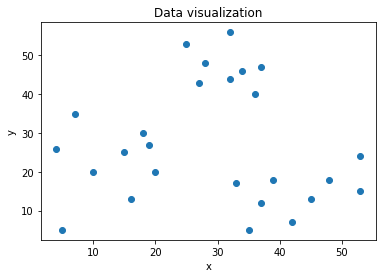

In [3]:
# TO DO: Plot the data using plt.scatter
# _________TO DO_________

plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data visualization')

After analyzing the data, we are going to create a K-Means Classifier. We provided you the code to create the classifier, predict the labels and plot the results. ***Use the number of clusters you visually identified previously.*** ***Change the color of the centrids plotted to black.***

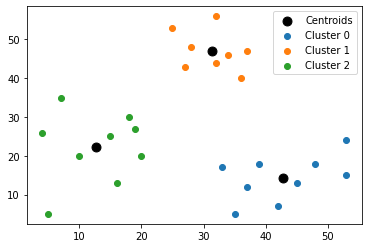

In [4]:
# TO DO: Define the number of clusters desired
num_clusters = 3# _________TO DO_________
# Create the KMeans classifier
kmeans = KMeans(n_clusters=num_clusters).fit(X)
#predict the labels of clusters
label = np.array([kmeans.fit_predict(X)])

# Extract centroids of clusters
centroids = kmeans.cluster_centers_

# Stack data and predicted labels
results = np.hstack((X,label.T))

# Plot the centroids
# TO DO: Change the color of the centrids plotted to black
plt.scatter(centroids[:,0] , centroids[:,1], s = 80, label = "Centroids", color= "black") # _________TO DO_________
# Plot the results
for i in range(0,num_clusters):
    # Filter results with label i
    X_filtered = results[(results[:,2]==i)]
    # Plot results with label i
    plt.scatter(X_filtered[:,0] , X_filtered[:,1] , label = "Cluster "+str(i))
plt.legend()
plt.show()

## **Elbow Method**

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. Normally it will be best if you previously know the number of clusters you want to have. In case you don't know this number, the Elbow Method is one of the most popular methods to determine this optimal value of K.

In the Elbow method, we are actually varying the number of clusters "K" from 1 to 10. For each value of K, we are calculating the WCSS (Within-Cluster Sum of Square), which is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks similar to an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. The K value corresponding to this point is the optimal K value or an optimal number of clusters.

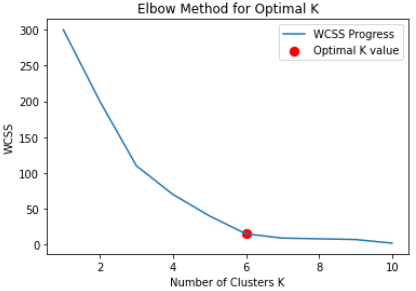



---



The dataset we are going to use here is a [Mall Customers Dataset](https://www.kaggle.com/datasets/shwetabh123/mall-customers). It’s unlabeled data that contains the gender, age, annual income(in thousands of dollars), and spending score of customers in a mall. The aim is to cluster the customers based on the annual income and spending score. 

First, run the following cell and load the "Mall_Customers.csv" file from your disk. This cells loads the .CSV file and extracts the annual income and spending score in the valiable X.

In [5]:
from google.colab import files
# Upload the file from disk
uploaded = files.upload()
# Read the .CSV file and store the data in a pandas dataset
dataset = pd.read_csv('Mall_Customers.csv')
#Extract the desired features
X = dataset.iloc[:, [3, 4]].values

Saving Mall_Customers.csv to Mall_Customers (1).csv


When we have the desired data, we have to compute the WCSS value (also known as inertia) for each value from 1 to 10. ***For each K value, create the K-Means Classifier, fit the X data and save the inertia value.***

In [6]:
# Array to store the WCSS values
wcss = [] 
# For each K value
for i in range(1, 11): 
    # TO DO: Create a K-Means Classifier with K=i
    kmeans = KMeans(n_clusters=i).fit(X)# _________TO DO_________
    # TO DO: Save the inertia value in the wcss array
    wcss.append(kmeans.inertia_)

print(f"wcss = {wcss}")

wcss = [269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 31248.853151807474, 25005.55037243283, 22813.907850185533, 19641.456216651564]


Now that we have the WCSS values, plot the resulting "Elbow". ***Which is the optimal K value?***


<font color="red"> The optimal value of <b>k</b> for tha <b>Mall_Customers dataset</b> is 5</font>

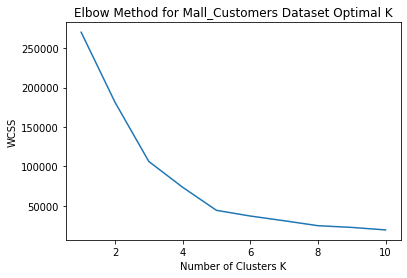

In [7]:
# Plot the WCSS with the K value
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method for Mall_Customers Dataset Optimal K")
plt.xlabel("Number of Clusters K")
plt.ylabel("WCSS")
plt.show()

Using the first example we had, ***create the K-Means Classifier with the optimal K value and plot the clustered data.***

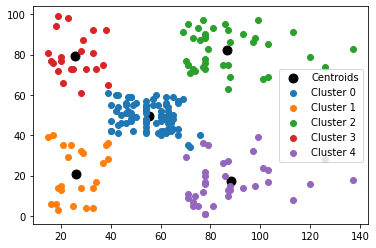

In [8]:
# TO DO: create the K-Means Classifier with the optimal K value and plot the clustered data
kmeans = KMeans(n_clusters=5).fit(X)# _________TO DO_________

#predict the labels of clusters
label = np.array([kmeans.fit_predict(X)])

# Extract centroids of clusters
centroids = kmeans.cluster_centers_

# Stack data and predicted labels
results = np.hstack((X,label.T))

# Plot the centroids
# TO DO: Change the color of the centrids plotted to black
plt.scatter(centroids[:,0] , centroids[:,1], s = 80, label = "Centroids", color= 'black') # _________TO DO_________
# Plot the results
for i in range(0,5):
    # Filter results with label i
    X_filtered = results[(results[:,2]==i)]
    # Plot results with label i
    plt.scatter(X_filtered[:,0] , X_filtered[:,1] , label = "Cluster "+str(i))
plt.legend()
plt.show()



---



Now that you know how the Elbow Method works, try and apply it to the first example we had. ***Is your number of clusters the same as the optimal one found with this method?***


<font color="red">Yes. The optimal value of k for the example corresponds with the number of k I initially selected (i.e k = 3) </font>

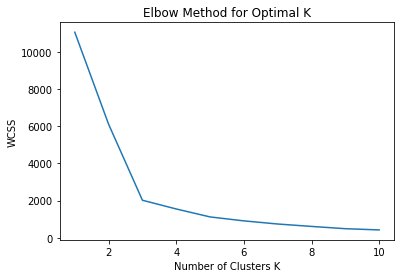

In [9]:
# Dataset
X = np.array([[5,5], [4,26], [7,35], [18,30], [10,20], [16,13], [20,20], [19,27], [15, 25],\
                   [25,53], [32,56], [37,47], [28,48], [34,46], [27,43], [36,40], [32,44],\
                   [33,17], [39,18], [53,24], [48,18], [53,15], [45,13], [37,12], [35,5], [42,7]])

# TO DO: Apply the elbow method to the fist dataset (defined above)
wcss = [] 
# For each K value
for i in range(1, 11): 
    # TO DO: Create a K-Means Classifier with K=i
    kmeans = KMeans(n_clusters=i).fit(X)# _________TO DO_________
    # TO DO: Save the inertia value in the wcss array
    wcss.append(kmeans.inertia_)

# _________TO DO_________
# TO DO: Plot the WCSS

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters K")
plt.ylabel("WCSS")
plt.show()

# _________TO DO_________